In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class f:
    def __init__(self):
        pass
    
    def f(self, x):
        return np.power(x,2)
    
    def df(self, x):
        return 2*x

class g:
    def __init__(self):
        pass
    
    def g(self, x):
        return np.power(x,3) - 10*np.power(x,2)
    
    def dg(self, x):
        return 3*np.power(x,2) - 20*x

class h:
    def __init__(self):
        pass
    def h(self, x):
        return np.power(x,4) - 10*np.power(x,2) - 2*x
    def dh(self, x):
        return 4*np.power(x,3) - 20*x - 2

def GD(x_init, n_iterations, lr, func_class):
    trajectory = np.zeros(n_iterations+1)
    trajectory[0] = x_init
    for i in range(n_iterations):
        if isinstance(func_class, f):
            grad = func_class.df(trajectory[i])
        elif isinstance(func_class, g):
            grad = func_class.dg(trajectory[i])
        elif isinstance(func_class, h):
            grad = func_class.dh(trajectory[i])
            
        trajectory[i+1] = trajectory[i] - lr*grad
    return trajectory

def SGD(x_init, n_iterations, lr, func_class, noise, sigma):
    trajectory = np.zeros(n_iterations+1)
    trajectory[0] = x_init
    for i in range(n_iterations):
        if isinstance(func_class, f):
            grad = func_class.df(trajectory[i])
        elif isinstance(func_class, g):
            grad = func_class.dg(trajectory[i])
        elif isinstance(func_class, h):
            grad = func_class.dh(trajectory[i])
        if noise == "Uniform":
            noise = np.random.uniform(-sigma, sigma)
        elif noise == "Normal":
            noise = np.random.normal(0, sigma**2)
        trajectory[i+1] = trajectory[i] - lr*grad + noise
    return trajectory

def plot_function(func_class):
    if isinstance(func_class, f):
        func = func_class.f
    elif isinstance(func_class, g):
        func = func_class.g
    elif isinstance(func_class, h):
        func = func_class.h
    
    x_vals = np.linspace(-20, 20, 100)  
    y_vals = np.array([func(x) for x in x_vals])
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, 'k-', label='f')
    plt.grid(True)
    plt.legend()
    return plt.gca()

def plot_trajectory(ax, func_class, x_init, n_iterations, lr, model_type, noise=None, sigma=None, color='r'):
    if isinstance(func_class, f):
        func = func_class.f
    elif isinstance(func_class, g):
        func = func_class.g
    elif isinstance(func_class, h):
        func = func_class.h
        
    if model_type == "GD":
        trajectory_x = GD(x_init, n_iterations, lr, func_class)
        trajectory_y = np.array([func(x) for x in trajectory_x])
    else:
        trajectory_x = SGD(x_init, n_iterations, lr, func_class, noise, sigma)
        trajectory_y = np.array([func(x) for x in trajectory_x])
    
    if noise is not None:
        ax.plot(trajectory_x, trajectory_y, 'o-', markersize=3, 
               label=f"{model_type}, noise={noise}, sigma={sigma}", color=color)
    else:
        ax.plot(trajectory_x, trajectory_y, 'o-', markersize=3, 
               label=f"{model_type}", color=color)
    ax.legend()
    
    
def plot_convergence(func_class, x_init, n_iterations, lr):
    if isinstance(func_class, f):
        func = func_class.f
    elif isinstance(func_class, g):
        func = func_class.g
    elif isinstance(func_class, h):
        func = func_class.h
    
    trajectory = GD(x_init, n_iterations, lr, func_class)
    
    plt.plot(range(n_iterations+1), [func(x) for x in trajectory], 'ro-', markersize=3, label='Function Value')
    plt.plot(range(n_iterations+1), trajectory, 'b-', label='x Value')
    plt.grid(True)
    plt.xlabel('Iterations')
    plt.ylabel('Values')
    plt.legend()
    plt.title(f'Convergence with lr={lr}, iterations={n_iterations}')

f_obj = f()
g_obj = g()
h_obj = h()

# f(x) = $x^2$ #

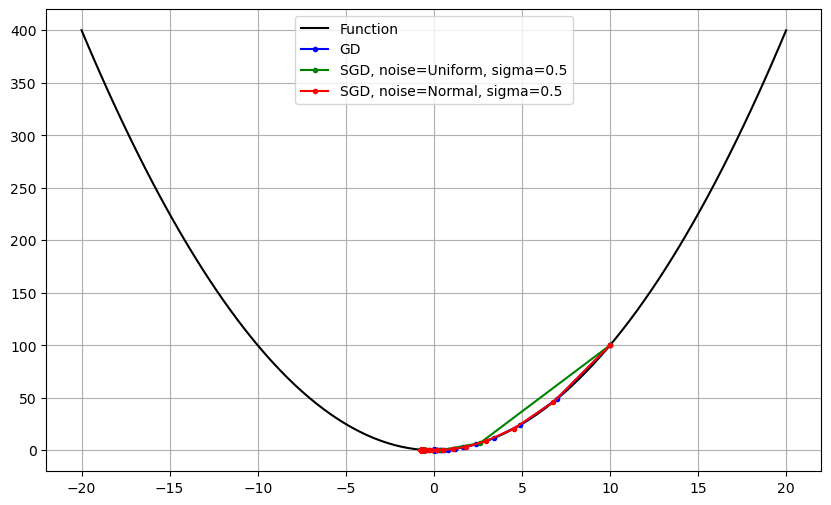

In [143]:

ax = plot_function(f_obj)


plot_trajectory(ax, f_obj, 10, 100, 0.15, "GD", color='b')
plot_trajectory(ax, f_obj, 10, 100, 0.35, "SGD", noise="Uniform", sigma=0.5, color='g')
plot_trajectory(ax, f_obj, 10, 100, 0.15, "SGD", noise="Normal", sigma=0.5, color='r')

plt.show()

# g(x) = $x^3 - 10x^2$ #

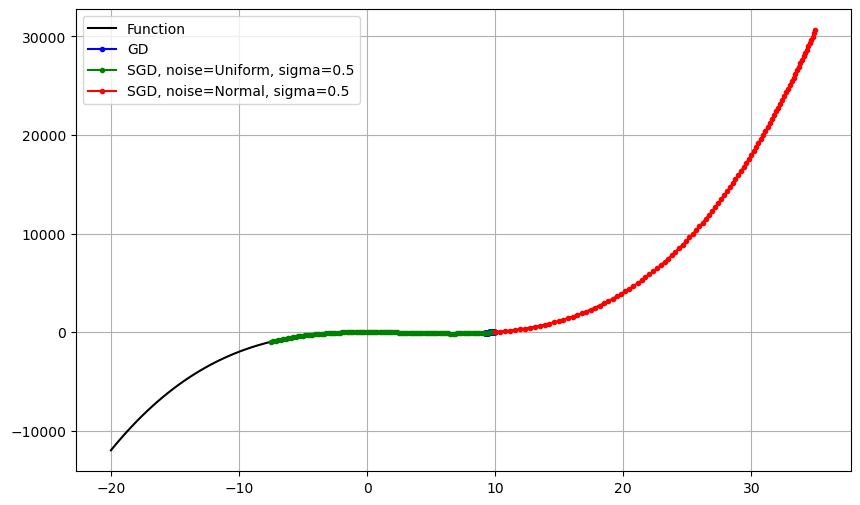

In [145]:

ax = plot_function(g_obj)


plot_trajectory(ax, g_obj, 10, 100, 0.0001, "GD", color='b')
plot_trajectory(ax, g_obj, 10, 100, 0.0001, "SGD", noise="Uniform", sigma=0.5, color='g')
plot_trajectory(ax, g_obj, 10, 100, 0.0001, "SGD", noise="Normal", sigma=0.5, color='r')


plt.show()

# h(x) = $x^4 - 10x^2 - 2x$ #

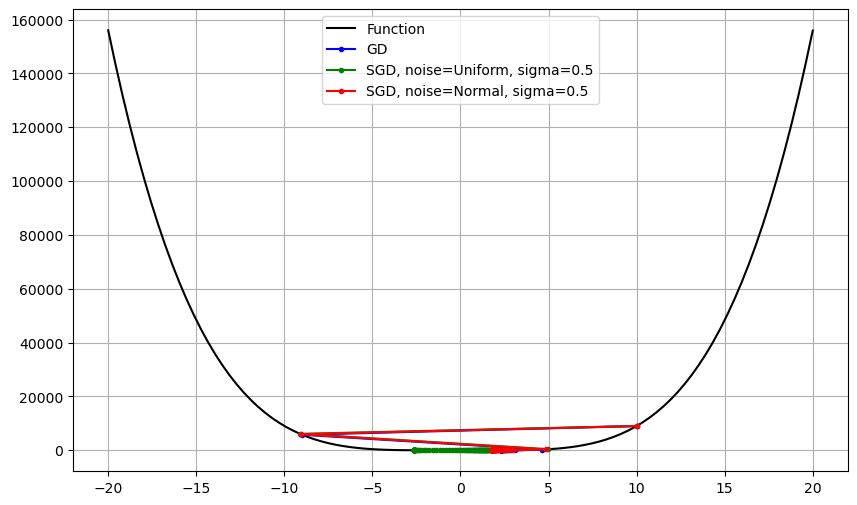

In [149]:

ax = plot_function(h_obj)


plot_trajectory(ax, h_obj, 10, 100, 0.005, "GD", color='b')
plot_trajectory(ax, h_obj, 10, 100, 0.005, "SGD", noise="Uniform", sigma=0.5, color='g')
plot_trajectory(ax, h_obj, 10, 100, 0.005, "SGD", noise="Normal", sigma=0.5, color='r')


plt.show()